In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("sales.csv")
conn = sqlite3.connect("sales_data.db")
df.to_sql("sales",conn,if_exists="replace",index=False)

14

In [4]:
query = """
SELECT product,
       SUM(quantity) as total_quantity,
       SUM(quantity * price) as revenue
FROM sales
GROUP BY product
"""
summary_df = pd.read_sql_query(query,conn)
print(summary_df)

   Product  total_quantity  revenue
0       AC              13   172141
1    Mouse              10    72210
2   laptop              11  1099992
3    phone              54  2523053
4  printer               6   383856


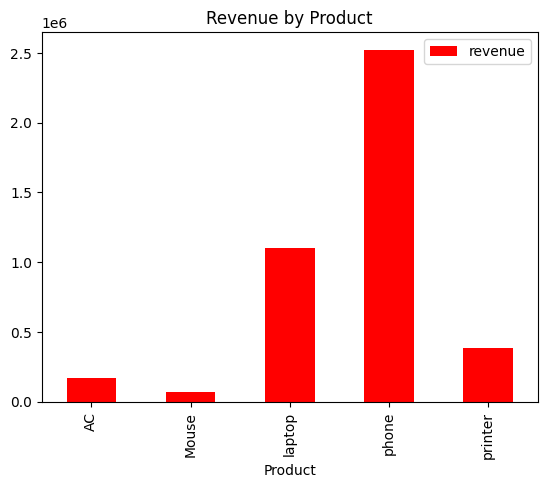

In [9]:
summary_df.plot(kind='bar',x='Product',y='revenue',title='Revenue by Product',color='red')
plt.tight_layout
plt.savefig("sales_chart,png")
plt.show()

conn.close()